In [2]:
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

from utils.utils_cpp import cpp_predictor
from utils.utils_cpp import cpp_generator
from utils.utils_cpp import cpp_optimizer
from utils.utils_common.activator import Activation

#### Filepaths

*_DATA_PATH : For datasets, to be used when training and sampling <br>
*_MODEL_PATH : For models, to be used when training to save the model, otherwise to load pre-trained models <br>
PREDICTOR_STATS_PATH : To save/load statistics for predictor training dataset <br>

SEQ_MAX : Maximum sequence length for predictor <br>
SEED_SEQ_LENGTH : Seed sequence length for generator <br>

SMILES_PATH : SMILES for monomers <br>
FP_RADIUS : Radius of topological exploration for fingerprint <br>
FP_BITS : Size of fingerprint bit-vector

In [7]:
GENERATOR_DATA_PATH = './dataset/data_cpp/cpp_generator_dataset.txt'
GENERATOR_MODEL_PATH = './model/model_cpp/cpp_generator.hdf5'
SEED_SEQ_LENGTH = 10

PREDICTOR_DATA_PATH = './dataset/data_cpp/cpp_predictor_dataset.csv'
PREDICTOR_MODEL_PATH = './model/model_cpp/cpp_predictor.hdf5'
PREDICTOR_STATS_PATH = './dataset/data_cpp/cpp_predictor_dataset_stats.json'

SMILES_PATH = './dataset/data_cpp/cpp_smiles.json'
FP_RADIUS = 3
FP_BITS = 1024
SEQ_MAX = 108

#### Generator

Creating an instance for Generator class with the dataset. <br>
Training and saving the generator

In [3]:
generator = cpp_generator.Generator(data_path = GENERATOR_DATA_PATH, seq_length = SEED_SEQ_LENGTH)

generator.train_model(
    model_params = {
        'save_checkpoint': True,
        'checkpoint_filepath': './model/'
        }
)

Loading Data for Training of Generator
Pre-Processing Data for Generator
Featurizing Data for Generator
Starting Training of Generator
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 5987 samples, validate on 2567 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/2
5987/5987 [==============================] - 5s 776us/sample - loss: 2.9019 - acc: 0.1527 - val_loss: 2.7053 - val_acc: 0.1944
Epoch 2/2
5987/5987 [==============================] - 4s 588us/sample - loss: 2.6929 - acc: 0.1884 - val_loss: 2.6680 - val_acc: 0.1944


#### Predictor

Creating an instance for Predictor class with the dataset and other parameters. <br>
Training and saving the predictor

Loading Data for Training of Predictor
Featurizing Data for Predictor
Creating Model for Predictor
Instructions for updating:
Use tf.cast instead.
Train on 409 samples, validate on 103 samples
Epoch 1/2
409/409 [==============================] - 3s 6ms/sample - loss: 1.2173 - val_loss: 0.4443
Epoch 2/2
409/409 [==============================] - 1s 1ms/sample - loss: 0.4253 - val_loss: 0.5574


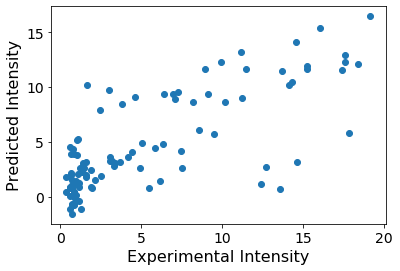

In [4]:
predictor = cpp_predictor.Predictor(
    data_path = PREDICTOR_DATA_PATH,
    smiles_path = SMILES_PATH,
    fp_radius = FP_RADIUS,
    fp_bits = FP_BITS,
    seq_max = SEQ_MAX
)

predictor.train_model(
    model_params = {
        'save_checkpoint': True,
        'checkpoint_filepath': './model/'
        }
)

#### Optimizer

Creating an instance for Optimizer class with the pre-trained models and data files. <br>
Sampling sequences using a pre-trained generator to seed the genetic algorithm. <br>
Optimizing the seed sequences.

In [5]:
optimizer = cpp_optimizer.Optimizer(
    model_path = PREDICTOR_MODEL_PATH,
    data_path = PREDICTOR_DATA_PATH,
    smiles_path = SMILES_PATH,
    stats_path = PREDICTOR_STATS_PATH,
    fp_radius = FP_RADIUS,
    fp_bits = FP_BITS,
    seq_max = SEQ_MAX
)

In [6]:
generator = cpp_generator.Generator(
    model_path = GENERATOR_MODEL_PATH,
    data_path = GENERATOR_DATA_PATH,
    seq_length = SEED_SEQ_LENGTH
)

In [7]:
list_seeds = generator.generate_seed(n_seeds = 2, seed_length = 30)

Generating Seeds for Optimizer
Generating Seed  1
Generating Seed  2


In [8]:
df = optimizer.optimize(list_seeds)
df.head(2)

Setting up Optimizer
Optimizing Seed  1
Optimizing Seed  2
Post-Processing Optimized Sequences


,sequences,intensity,length,relative_Arg,relative_charge
73,LXXRHFPPKCHHFCLKKPPLKKNCTHTXXLGBNXGBCG,11.7136,38,0.0263158,0.237084
79,FXXCHFPPKCHHFCLKKPPXKKNCTHTXXLGBNXGBNGK,11.4768,39,0,0.230962


#### Activation Analysis

Visualizing the gradient activation of peptide sequence (ex. penetratin) based on pre-trained predictor.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Positive activation for feature map


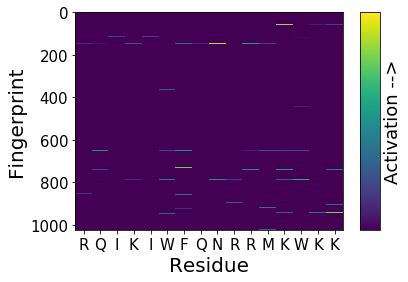

Positive activation averaged over residues


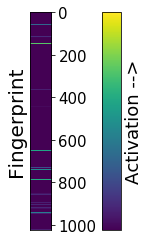

Positive activation averaged over fingerprints


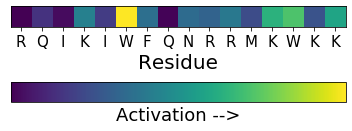

In [8]:
activator = Activation(
    mode = 'cpp',
    model_path = PREDICTOR_MODEL_PATH,
    smiles_path = SMILES_PATH,
    stats_path = PREDICTOR_STATS_PATH,
    fp_radius = FP_RADIUS,
    fp_bits = FP_BITS,
    seq_max = SEQ_MAX
)

activator.analyze('RQIKIWFQNRRMKWKK')